✅ Data Loaded Successfully
Shape: (128976, 21)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128

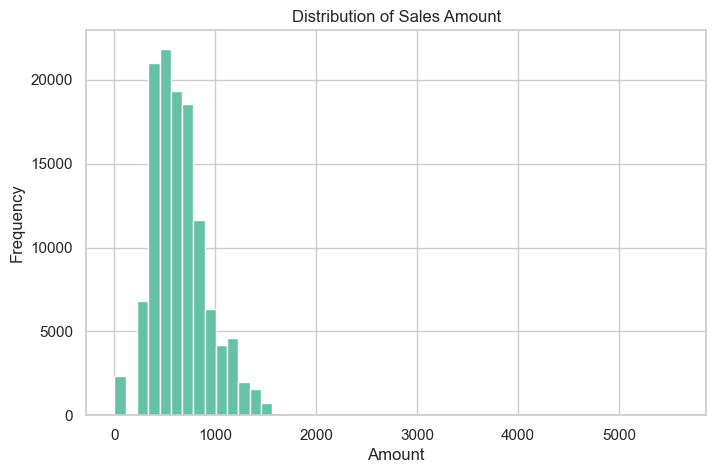

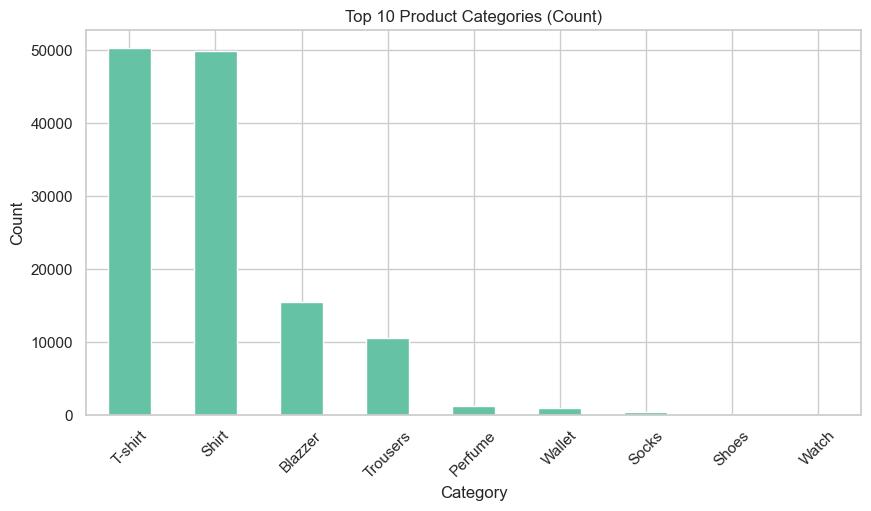

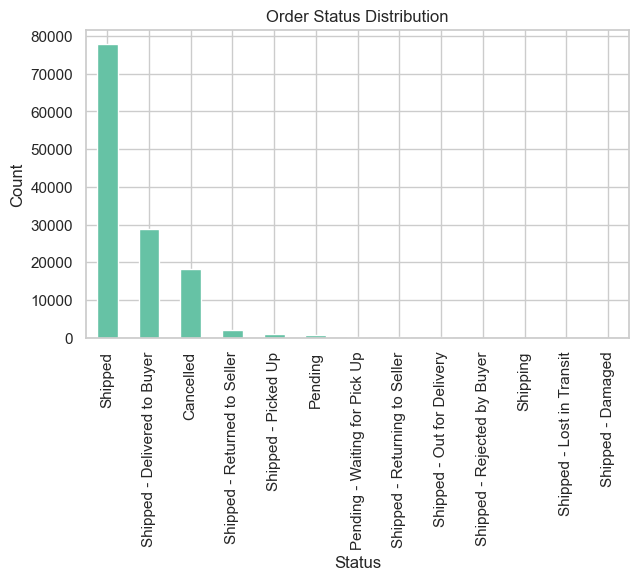

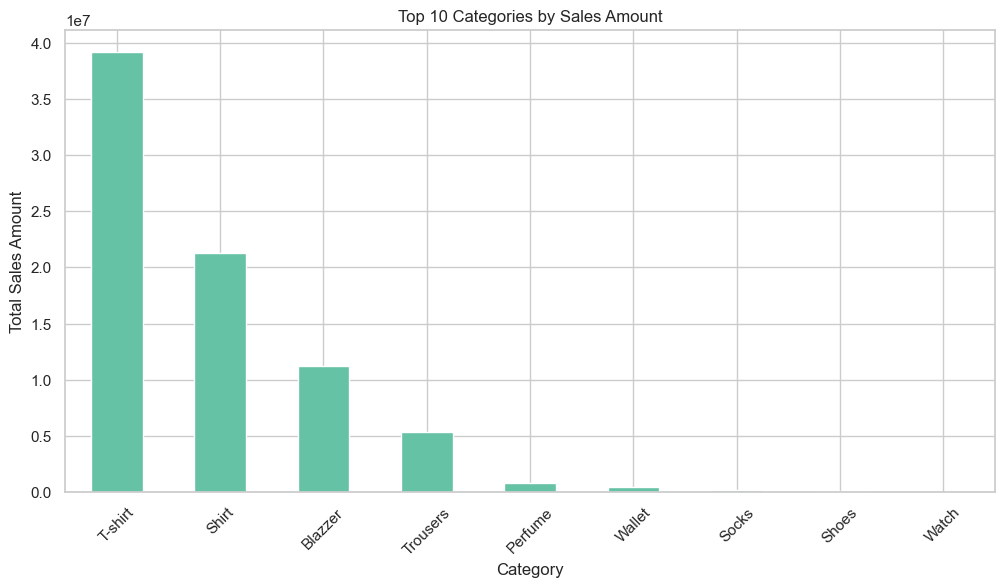

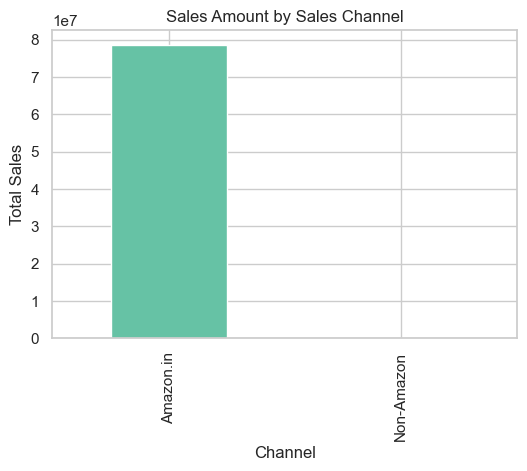

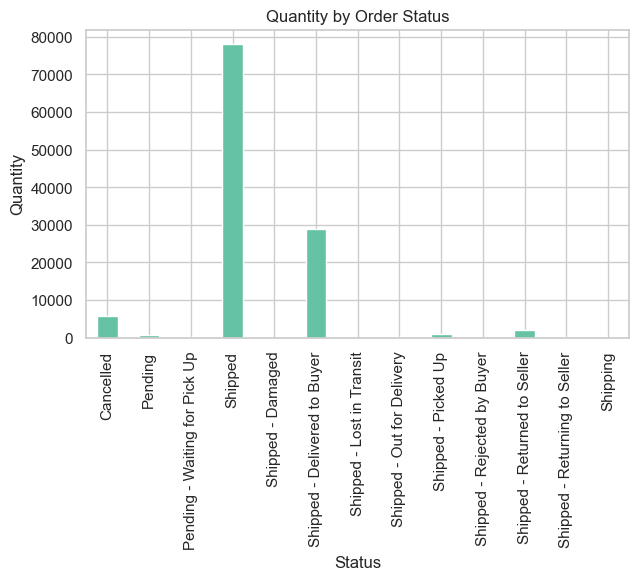

C:\Users\aishw\AppData\Local\Temp\ipykernel_10912\3779165747.py:89: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


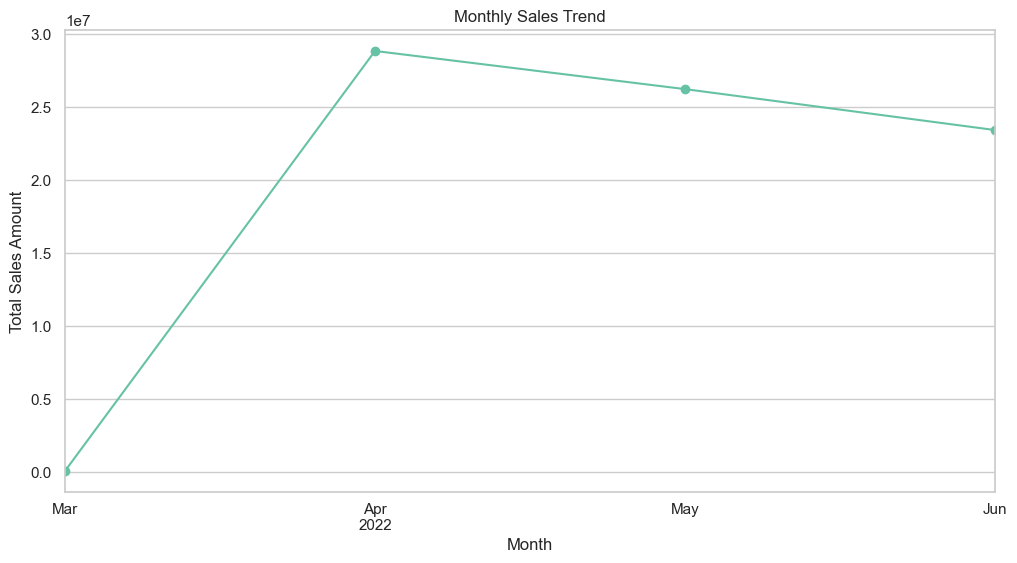

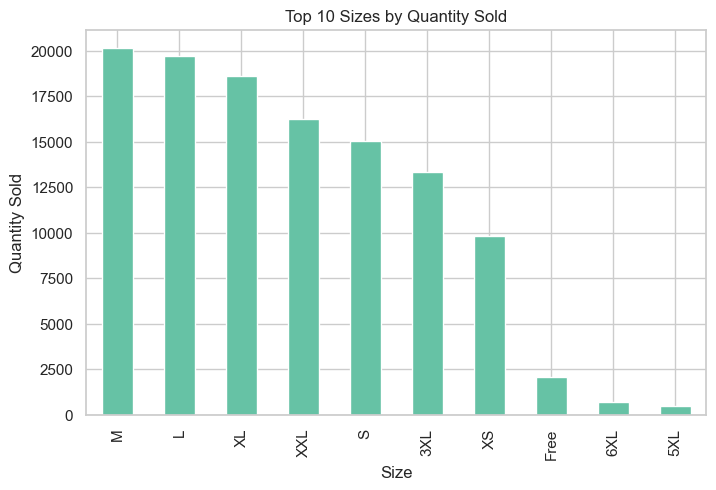

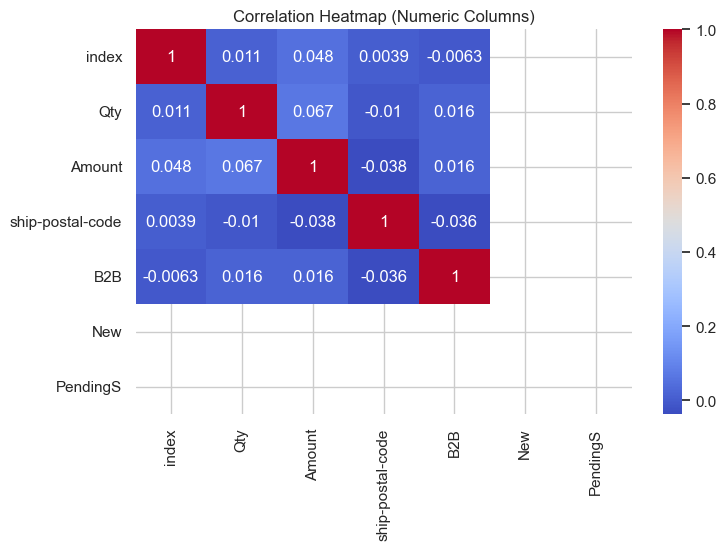

In [ ]:
# ===============================
# Amazon Sales Analysis - Step 2 (EDA)
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set_theme(style="whitegrid", palette="Set2")

# ===============================
# 1. Load Dataset
# ===============================
df = pd.read_csv(r"C:\Users\aishw\OneDrive\Documents\Python Proj\Amazon-sales-Analysis\data\Amazon Sale Report.csv")   # adjust path if needed

print("✅ Data Loaded Successfully")
print("Shape:", df.shape)

# ===============================
# 2. Basic Info
# ===============================
print("\n--- Info ---")
print(df.info())

print("\n--- Describe ---")
print(df.describe(include='all'))

# ===============================
# 3. Univariate Analysis
# ===============================
# Amount distribution
plt.figure(figsize=(8,5))
df['Amount'].hist(bins=50)
plt.title("Distribution of Sales Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Top 10 Categories
plt.figure(figsize=(10,5))
df['Category'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Product Categories (Count)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Status counts
plt.figure(figsize=(7,4))
df['Status'].value_counts().plot(kind='bar')
plt.title("Order Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

# ===============================
# 4. Bivariate Analysis
# ===============================
# Category vs Amount
plt.figure(figsize=(12,6))
df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Categories by Sales Amount")
plt.xlabel("Category")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

# Sales Channel vs Amount
plt.figure(figsize=(6,4))
df.groupby('Sales Channel')['Amount'].sum().plot(kind='bar')
plt.title("Sales Amount by Sales Channel")
plt.xlabel("Channel")
plt.ylabel("Total Sales")
plt.show()

# Status vs Qty
plt.figure(figsize=(7,4))
df.groupby('Status')['Qty'].sum().plot(kind='bar')
plt.title("Quantity by Order Status")
plt.xlabel("Status")
plt.ylabel("Quantity")
plt.show()

# ===============================
# 5. Time-based Analysis
# ===============================
# Convert Date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.to_period('M')

plt.figure(figsize=(12,6))
df.groupby('Month')['Amount'].sum().plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

# ===============================
# 6. Customer & Product Insights
# ===============================
# Top 10 Sizes
plt.figure(figsize=(8,5))
df.groupby('Size')['Qty'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Sizes by Quantity Sold")
plt.xlabel("Size")
plt.ylabel("Quantity Sold")
plt.show()

# ===============================
# 7. Correlation
# ===============================
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()
